In [46]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import yfinance as yf
from yahoofinancials import YahooFinancials
import datetime

Trying in a different way

In [47]:
#Defining start and end dates
start_date = datetime.datetime(2019,1,1)
end_date = datetime.datetime(2022,4,1)

#Since several stocks will be pulled we define these variables 
stock1 = 'AAPL'
stock2 = 'MSFT'
stock3 = 'TSLA'

In [48]:
df = yf.download([stock1,stock2,stock3],start=start_date, end=end_date)

[*********************100%***********************]  3 of 3 completed


In [49]:
#We are only interested in the adjusted close prices
#Normalizing daily adjusted returns
df = np.log(1+ df['Adj Close'].pct_change())

df

,AAPL,MSFT,TSLA
Date,,,
2018-12-31,NaN,NaN,NaN
2019-01-02,0.001141,-0.004440,-0.070582
2019-01-03,-0.104925,-0.037482,-0.031978
2019-01-04,0.041803,0.045460,0.056094
2019-01-07,-0.002228,0.001275,0.052935
...,...,...,...
2022-03-25,0.003727,-0.001382,-0.003240
2022-03-28,0.005024,0.022853,0.077281
2022-03-29,0.018954,0.015046,0.007055


The portfolio return is given as
$$\begin{equation} E(x)=w_1*\mu_1+w_2*\mu_2+...+w_n*\mu_n \end{equation}$$
where $w_n$ is the weight of the asset $n$ and $\mu_n$ is the mean return of asset $n$ 

In [52]:
weights = [0.25,0.25,0.25]

In [56]:
#Using the portfolio return formular
return1=weights[0]*df.AAPL.mean()+weights[1]*df.MSFT.mean()+weights[2]*df.TSLA.mean()

#Using the dot product in numpy gives the same result, but is more efficient and scalable
return_np = np.dot(df.mean(),weights)

print(return_1)
print(return_np)

#Defining a variable 
def portfolioreturn(weights):
    return np.dot(df.mean(),weights)

portfolioreturn(weights)


0.001663371979599752
0.001663371979599752


0.001663371979599752

The portfolio variance is given as
$$\begin{equation} Var(x)=w_1^2*\sigma_1^2+w_2^2*\sigma_2^2+...+2*w_n^2*\sigma_n^2*Cov_{1,2,...,n} \end{equation}$$
where $w_n$ is the weight of the asset $n$, $\sigma_n$ is the standard deviation of asset $n$ and $Cov_{1,2,...,n}$ is the covariance between asset $1,2...,n$

In [57]:
#Finding the covariance
df.cov()

,AAPL,MSFT,TSLA
AAPL,0.000455,0.000319,0.000421
MSFT,0.000319,0.000371,0.000382
TSLA,0.000421,0.000382,0.001793


In [58]:
#solving the variance for the portfolio
pv = weights[0]**2*df.cov().iloc[0,0]+weights[1]**2*df.cov().iloc[1,1]*2*weights[0]*weights[1]*df.cov().iloc[0,1]
pv

#solving with numpy dot product
portfolio_var= np.dot(np.dot(df.cov(), weights),weights)

#portfolio standard deviation
std=pv**(1/2)
portfolio_std=portfolio_var**(1/2)

#Defining a variable for portfolio standard deviation. the np.sqrt(250) is the annualized standard deviation
def portfoliostd(weights):
    return (np.dot(np.dot(df.cov(), weights),weights))**(1/2)*np.sqrt(250)

print('the variance of the portfolio is ' + str(pv), 'and the portfolio standard variation is ' + str(std))

print('the variance of the portfolio is ' + str(portfolio_var), 'and the portfolio standard variation is ' + str(portfolio_std))

the variance of the portfolio is 2.8429567284149883e-05 and the portfolio standard variation is 0.0053319384171377935
the variance of the portfolio is 0.0003039418315095695 and the portfolio standard variation is 0.01743392759849511


In [59]:
portfoliostd(weights)

0.27565459886857024

Random portfolio weights for the efficient frontier

In [61]:
def weightscreator(df):
    rand = np.random.random(len(df.columns)) #using len to take the column length of our dataframe - scalable if more stocks will be included
    rand /= rand.sum() #as the sum of the weights always should be 1
    return rand

weightscreator(df)

array([0.05149898, 0.66900058, 0.27950044])

In [62]:
returns =[]
stds = []
w = []

for i in range(500):
    weights =weightscreator(df) #getting 500 different weights
    returns.append(portfolioreturn(weights))
    stds.append(portfoliostd(weights))
    w.append(weights)

Text(0, 0.5, 'Portfolioreturn')

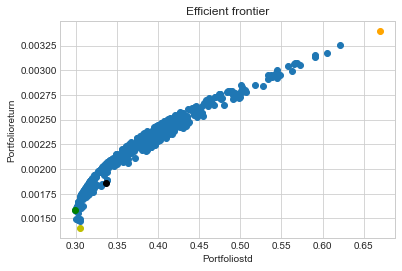

In [63]:
plt.scatter(stds, returns)
plt.scatter(df.std().iloc[0]*np.sqrt(250),df.mean().iloc[0],c='k') 
plt.scatter(df.std().iloc[1]*np.sqrt(250),df.mean().iloc[1],c='y')
plt.scatter(df.std().iloc[2]*np.sqrt(250),df.mean().iloc[2],c='orange')
plt.scatter(min(stds),returns[stds.index(min(stds))], c='green') #minimum variance portfolio
plt.title("Efficient frontier")
plt.xlabel("Portfoliostd")
plt.ylabel("Portfolioreturn")

In [64]:
returns[stds.index(min(stds))]


0.0015843757023761653